In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
X = np.random.randint(25, 50, (25, 2))
Y = np.random.randint(60, 85, (25, 2))

Z = np.vstack((X, Y))
Z = np.float32(Z)
print(Z)

[[47. 32.]
 [36. 35.]
 [28. 29.]
 [41. 43.]
 [25. 46.]
 [30. 35.]
 [36. 25.]
 [47. 31.]
 [29. 28.]
 [37. 41.]
 [26. 33.]
 [42. 27.]
 [31. 26.]
 [35. 26.]
 [28. 30.]
 [42. 34.]
 [27. 49.]
 [31. 44.]
 [40. 28.]
 [30. 49.]
 [33. 28.]
 [41. 28.]
 [32. 32.]
 [38. 38.]
 [43. 48.]
 [74. 75.]
 [82. 69.]
 [73. 80.]
 [81. 65.]
 [73. 65.]
 [61. 68.]
 [75. 62.]
 [77. 71.]
 [78. 71.]
 [66. 82.]
 [60. 72.]
 [84. 71.]
 [79. 72.]
 [76. 68.]
 [73. 81.]
 [83. 63.]
 [77. 80.]
 [67. 62.]
 [76. 68.]
 [84. 70.]
 [77. 74.]
 [63. 70.]
 [68. 74.]
 [67. 60.]
 [84. 75.]]


In [6]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, label, center = cv2.kmeans(Z, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [7]:
A = Z[label.ravel() == 0]
B = Z[label.ravel() == 1]

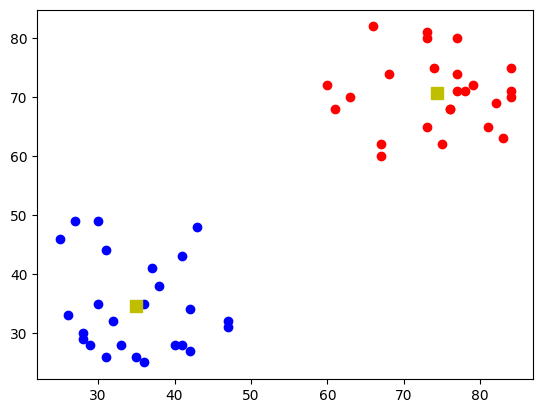

In [8]:
plt.scatter(A[:, 0], A[:, 1], c='b')
plt.scatter(B[:, 0], B[:, 1], c='r')
plt.scatter(center[:, 0], center[:, 1], s=80, c='y', marker='s')
plt.show()

(600, 800, 3)


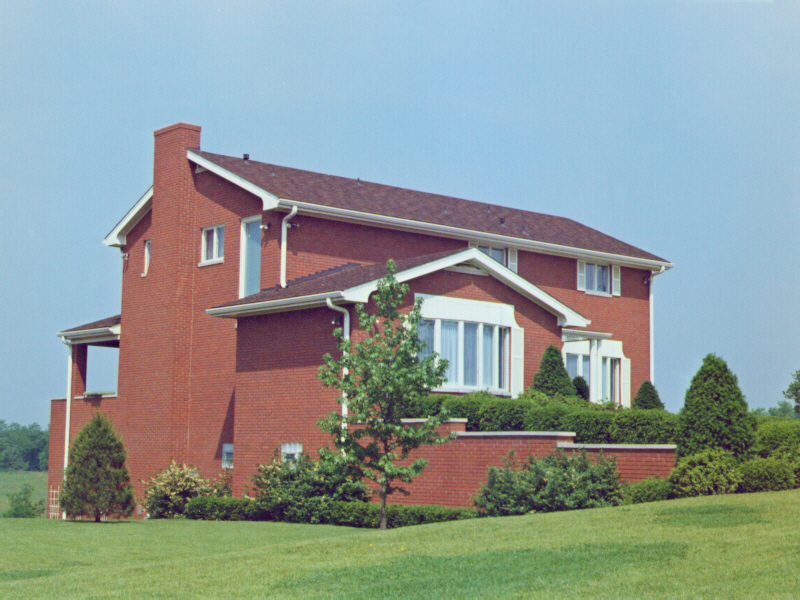

In [10]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/home3.jpg')
print(img.shape)
#gimg=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg, cmap='gray')
cv2_imshow(img)

In [11]:
Z = img.reshape((-1, 3))
Z = np.float32(Z)
print(Z.shape)

(480000, 3)


In [48]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
#ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

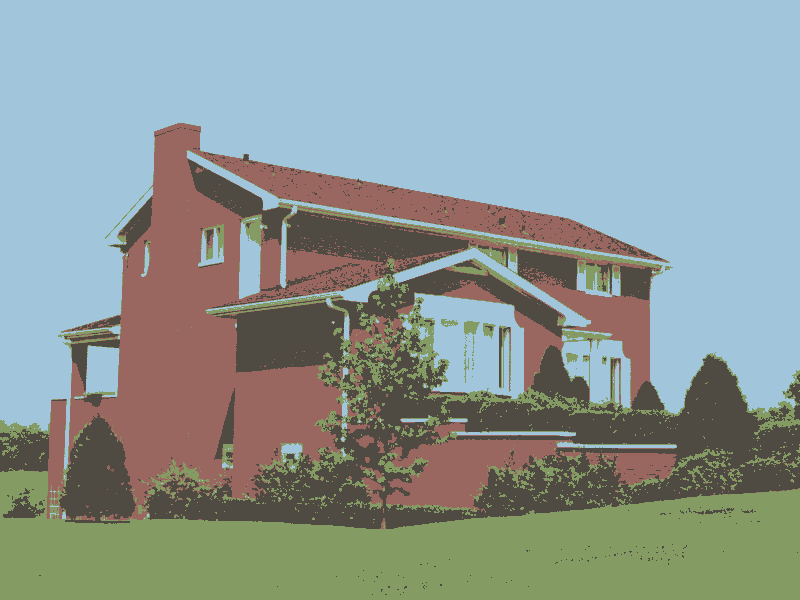

In [17]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2_imshow(res2)

(480, 1622, 3)


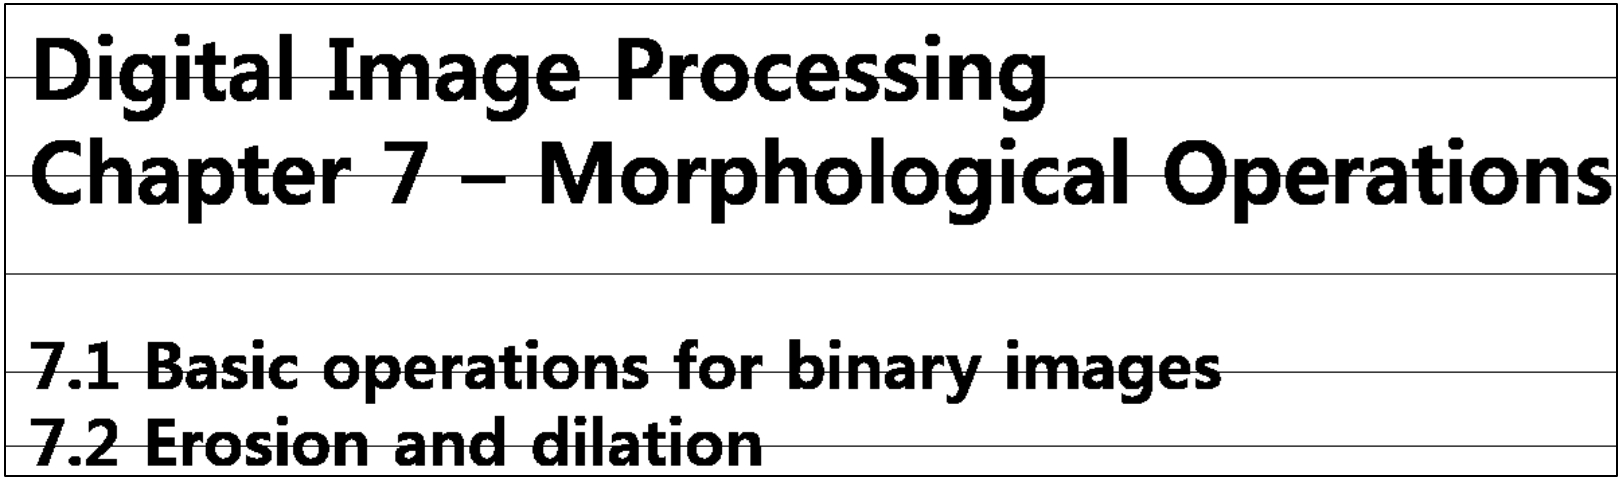

In [23]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/scanimg.jpg')
print(img.shape)
gimg=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg, cmap='gray')
cv2_imshow(gimg)

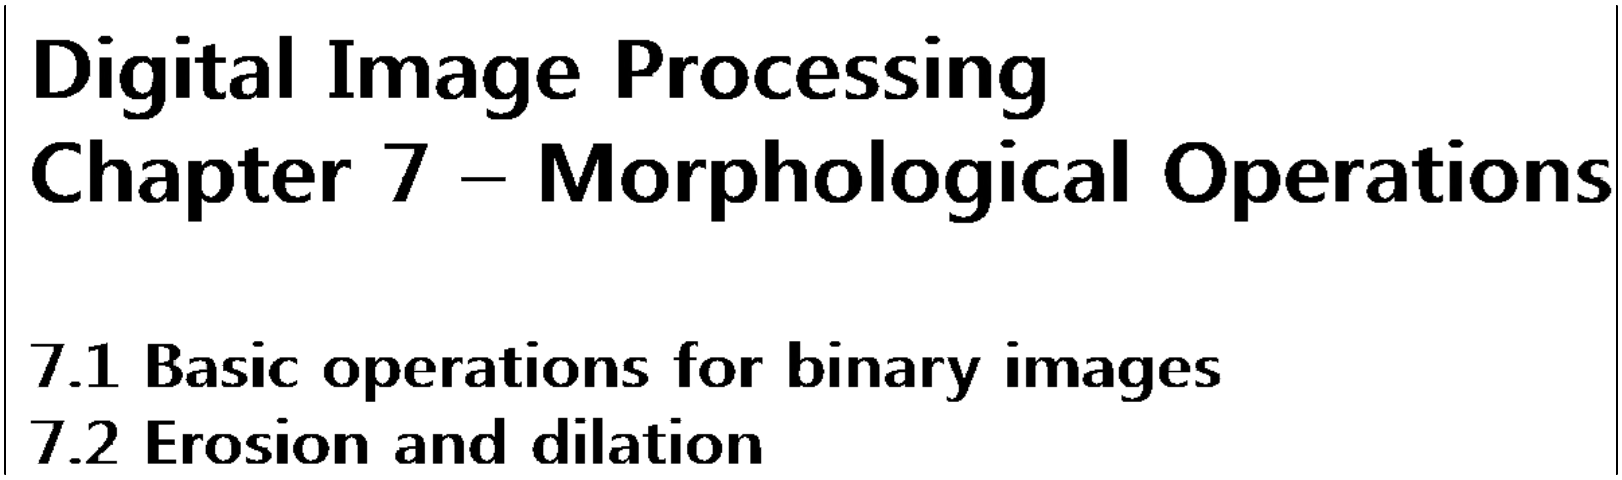

In [32]:
kernel = np.ones((3, 1), np.uint8)
dilate = cv2.dilate(gimg, kernel, iterations=2)
cv2_imshow(dilate)

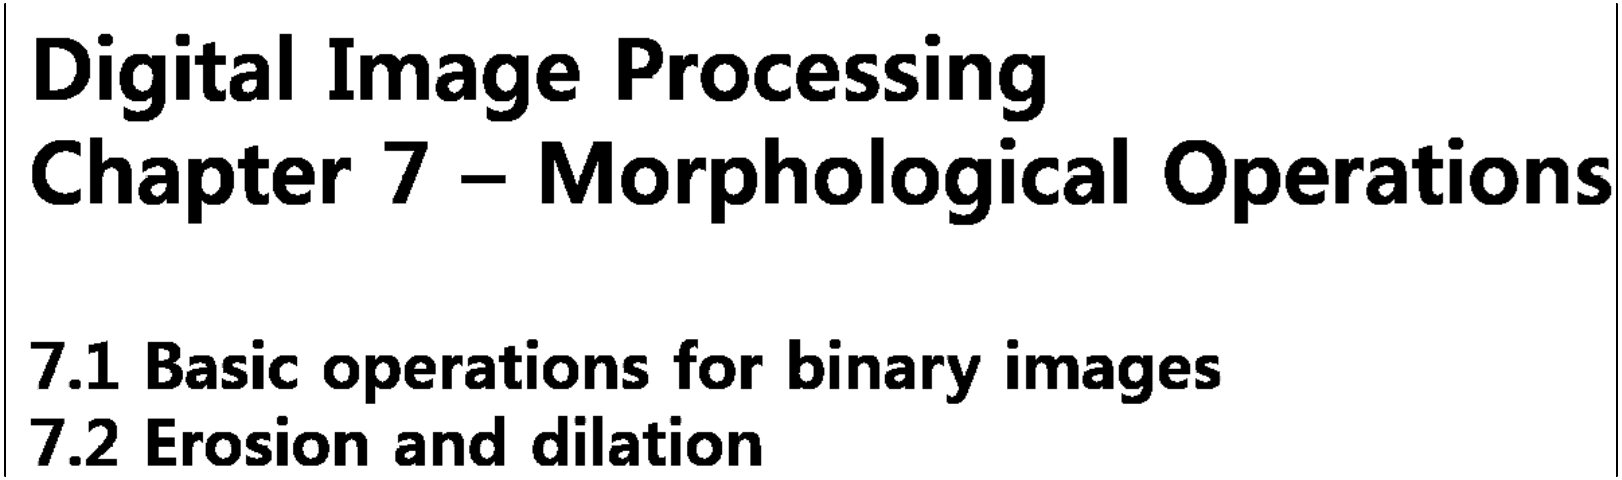

In [33]:
kernel = np.ones((3, 1), np.uint8)
erosion = cv2.erode(dilate, kernel, iterations=2)
cv2_imshow(erosion)

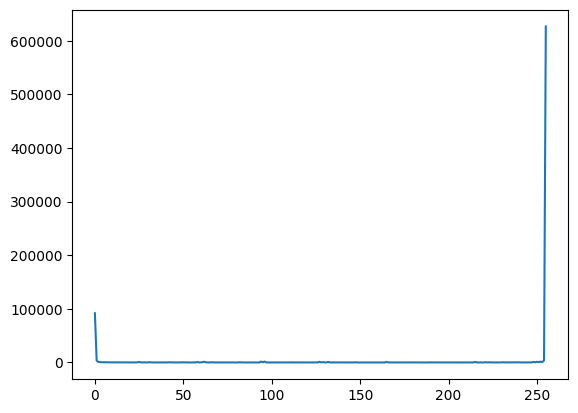

In [35]:
hist = cv2.calcHist([gimg], [0], None, [256], [0, 256])
plt.plot(hist)

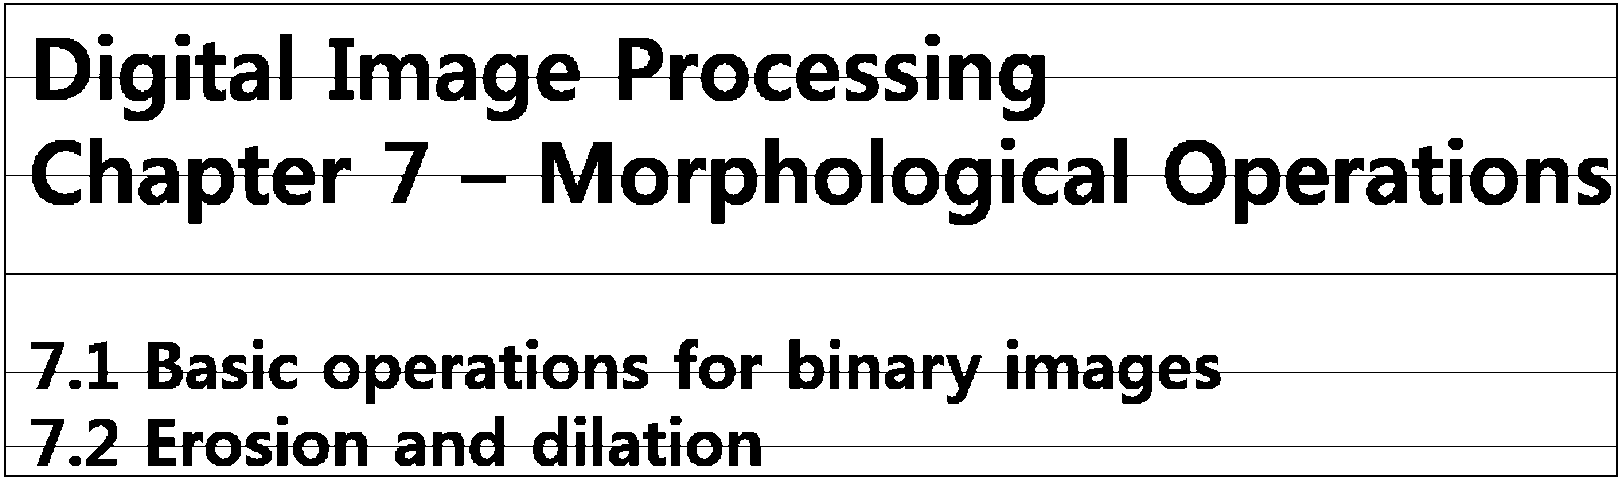

In [39]:
gBin = np.zeros((gimg.shape[0], gimg.shape[1]), dtype = np.uint8)

threshold = 120

for i in range(gimg.shape[0]):
  for j in range(gimg.shape[1]):
    if gimg[i, j] > threshold:
      gBin[i, j] = 255

cv2_imshow(gBin)

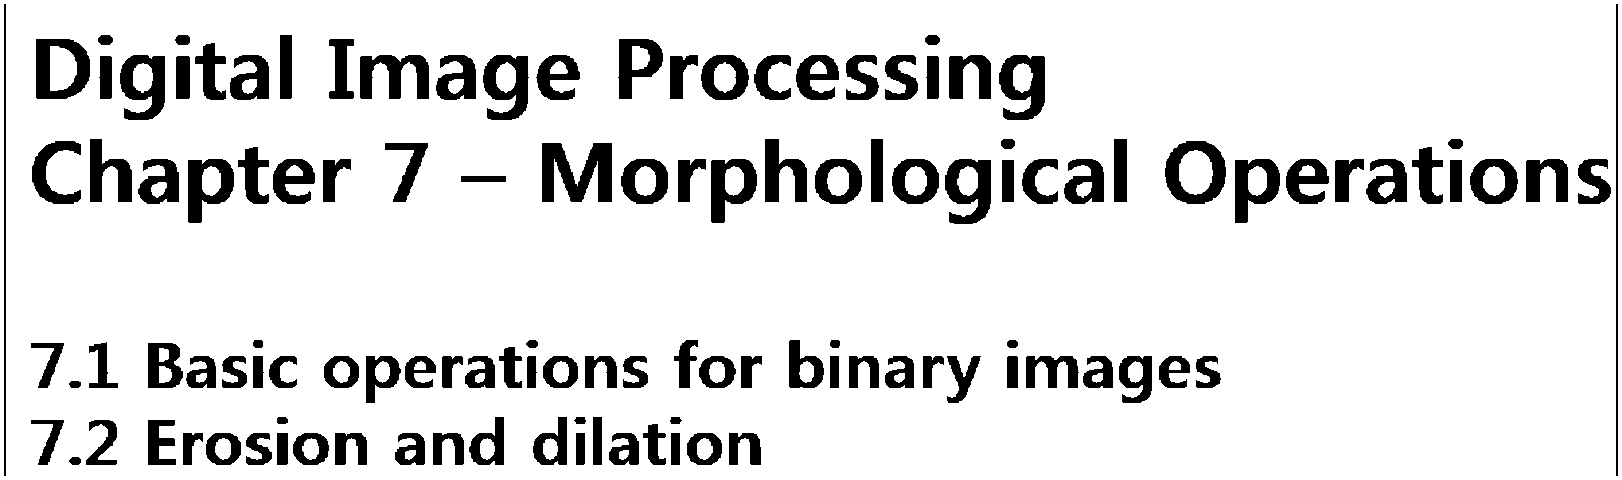

In [45]:
kernel = np.ones((3, 1), np.uint8)
dilate = cv2.dilate(gBin, kernel, iterations=1)
cv2_imshow(dilate)

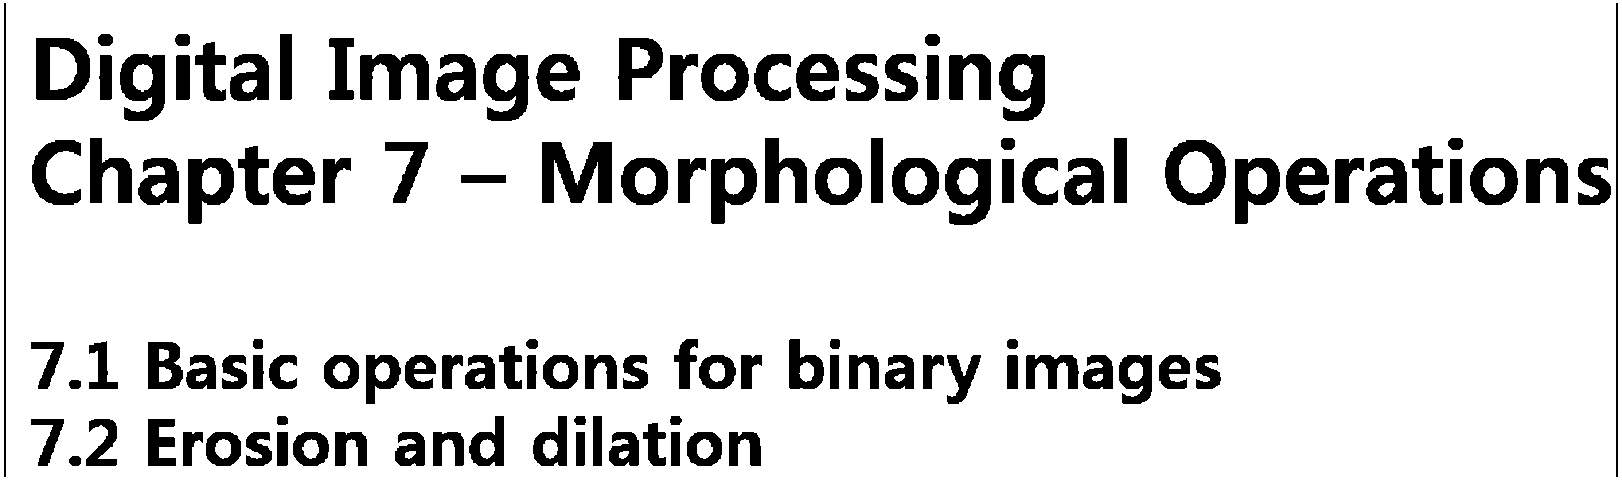

In [47]:
kernel = np.ones((3, 1), np.uint8)
erosion = cv2.erode(dilate, kernel, iterations=1)
cv2_imshow(erosion)